<a href="https://colab.research.google.com/github/248KMB/SpaceShipTatanic/blob/main/MAIN_CS4661_PROJECT_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd

**This code uses three types of csv files , first is just a sample copy on how and what the goal is for this project  , the second "df_test" will be the dataframe we are going to use when we gathered all the required data, and finally df_train will be the dataframe we will be using to get the accuracies of all possible algorithems.**

In [ ]:
df_sample = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/sample_submission.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/train.csv')

We decided to not use this dataframe do to the reason that it does not have a label nor enough data to work with. Therefore, we will not use this because we do not need it.

In [ ]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


**However, we decided to use this dataframe because it has a label and alot more data to work with for the betterment of our algorithms.**

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


**We encountered cols wihtin the dataframe that were empty(NaNs) and decided the best way to solve this problems is to create a code that will fill in those empty cols, we used fillna that basically takes the mean of the entire col and fills the empty slot with that number.**

In [ ]:
# Handle missing values by filling them with the mean of the respective columns
df_train.fillna(df_train.mean(), inplace=True)

<ipython-input-5-d38401c2b0e1>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.fillna(df_train.mean(), inplace=True)


**After filling the empty cols with the mean of each respective col, we chose to delete the newly created cols 'CryoSleep_0.35830580462482303' 'VIP_0.023439340400471142' since these cols are not needed nor important.**

In [ ]:
# creates dummy colums using get_dummies func and selecting the cols Thal and ChestPain from dataframe
df_train_encoded = pd.get_dummies(df_train, columns = ['HomePlanet', 'CryoSleep' ,'VIP'] )

df_train_encoded.head()# prints newly encoded data with the categorical cols

,PassengerId,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_0.35830580462482303,CryoSleep_True,VIP_False,VIP_0.023439340400471142,VIP_True
0,0001_01,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,1,0,0,1,0,0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,1,0,0,1,0,0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,0,0,0,0,1
3,0003_02,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,1,0,0,1,0,0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,0,0,1,0,0


**We then deleted the these two cols to get the final cleaned out dataframe, we used drop function to temporally delete the two cols.**

In [ ]:
# List of columns to be deleted
columns_to_delete = ['CryoSleep_0.35830580462482303', 'VIP_0.023439340400471142']

# Use the drop method to remove the specified columns
df_train_encoded = df_train_encoded.drop(columns=columns_to_delete)
df_train_encoded.head()# prints newly encoded data with the categorical cols


,PassengerId,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,0001_01,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,1,0,1,0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,1,0,1,0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,0,0,1
3,0003_02,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,1,0,1,0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,0,1,0


**We now grabbed all features that we believe will be the most important, we
than converted it to X and set the y target to be transported since the goal is to pridect who got transportated.**

In [ ]:
feature_cols = ['Age', 'HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep_False','CryoSleep_True','VIP_False','VIP_True']
X = df_train_encoded[feature_cols]
y = df_train['Transported']

**We did split the training set for KNN. With extensive testing we came to the conclusion that 20 percent will be the best for testing and the rest of the 80 percetn will be for training. Futhermore, we chose to keep random satte at 9 because it gave us the most accuract combination with the test size.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9) # splits

# **KNN Classifier**


****

**This code creates a range list of 1 - 31 by 5 for the k valeus which will be used for the for loop that will call in KNN classifier for getting the predition/ accuracy. Once the KNN sequence is finished the loop will print the value combinations and print out the accuracies for each combination. When the loop is finished, the code will finally print out which combination gave out the best accuracy**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list of k values
k_values = list(range(1, 31, 5))

# Initialize variables to store the highest accuracy and corresponding k value
highest_accuracy = 0
best_k = 0

# Loop through each k value and print the accuracy
for k in k_values:
    # Initialize and train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    y_predict = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current k value
    print(f"Accuracy on Testing Data of KNN Classifier with k={k}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_k = k

# Print the highest accuracy and corresponding k value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (k={best_k})")

Accuracy on Testing Data of KNN Classifier with k=1: 0.65
Accuracy on Testing Data of KNN Classifier with k=6: 0.69
Accuracy on Testing Data of KNN Classifier with k=11: 0.72
Accuracy on Testing Data of KNN Classifier with k=16: 0.72
Accuracy on Testing Data of KNN Classifier with k=21: 0.73
Accuracy on Testing Data of KNN Classifier with k=26: 0.73

Highest Accuracy: 0.73 (k=21)


### KNN ROC

**We use this code to utilize the sklearn library by performing the KNN and evaluate the model's performance with the Receiver Operating Characteristic (ROC) curve analysis as we set a specific k value that initializes and train with KNN classifier and make predictions on the testing thus calculating the ROC curve, Area Under the Curve (AUC), and lastly the plot of the ROC curve by using the mayplotplib. The resulting plot display ROC curve, a random guess line, and relevant labels and legend as we choose the chosen value k = 21.**

AUC: 0.7775009260239177


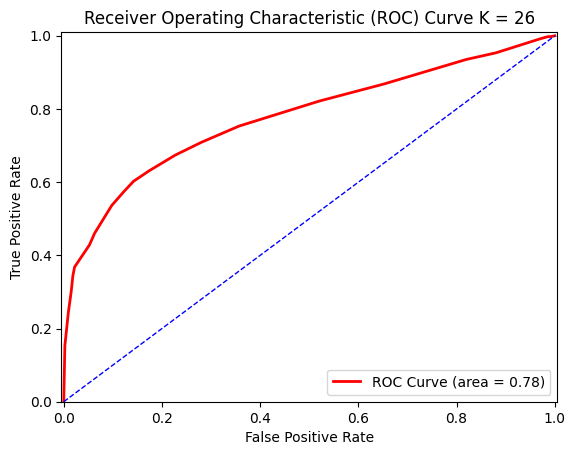

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Set the desired k value
k = 21

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_predict_prob = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob, pos_label=1)

# Calculate AUC
AUC = roc_auc_score(y_test, y_predict_prob)
print("AUC:", AUC)

# Creating the ROC GRAPH
plt.figure()

# ROC Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve K = 26')
plt.legend(loc="lower right")

# Show the plot
plt.show()

## **KNN with Cross Validation**

**In this code we create a range list of 1 - 31 by 5 for the k values which will be used for the for loop that will call in KNN classifier for getting the prediction/ accuracy. It uses a k-fold cross-validation to evaluate the classifier's accuracy thus printing the mean accuracy for each configuration which then identifies the k value that yields the highest ean accuracy accross the folds and finally printing out the best accuracy of cross-validation.**

In [ ]:
from sklearn.model_selection import cross_val_score

# List of k values for KNN
k_values = list(range(1, 35, 5))

# Initialize variables to keep track of the highest accuracy and corresponding k value
highest_accuracy = 0  # Assuming accuracy is between 0 and 1
best_k = 0

# Iterate over different k values
for k in k_values:
    # Create KNN classifier with current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Perform k-fold cross-validation and calculate accuracy scores
    knn_scores = cross_val_score(knn_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    knn_mean_accuracy = knn_scores.mean()

    # Print the mean accuracy for the current k value
    print(f"KNN with k={k} - Accuracy with Cross Validation: {round(knn_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if knn_mean_accuracy > highest_accuracy:
        highest_accuracy = knn_mean_accuracy
        best_k = k

# Print the highest accuracy and corresponding k value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (k={best_k})")

KNN with k=1 - Accuracy with Cross Validation: 0.64
KNN with k=6 - Accuracy with Cross Validation: 0.69
KNN with k=11 - Accuracy with Cross Validation: 0.7
KNN with k=16 - Accuracy with Cross Validation: 0.72
KNN with k=21 - Accuracy with Cross Validation: 0.72
KNN with k=26 - Accuracy with Cross Validation: 0.73
KNN with k=31 - Accuracy with Cross Validation: 0.73

Highest Accuracy: 0.73 (k=26)


### KNN with Cross Validation ROC

**We then use this code KNN with cross-validation to evaluate the model's performance with ROC curve analysis. As we set a specific value for k = 26, then initializes and train KNN classfier, then uses cross_val_predict to obtain prediction for each of the fold cross-validation, calculate ROC curve, AUC and lastly the plot of ROC curve.**

AUC: 0.742529632765372


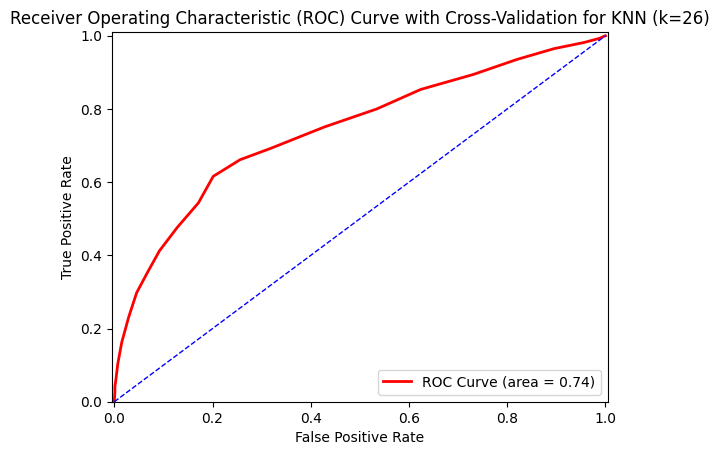

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Set the desired k value
k = 26

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Use cross_val_predict for predictions within each fold of cross-validation
y_predict_prob_knn = cross_val_predict(knn_classifier, X_test, y_test, cv=10, method='predict_proba')[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob_knn, pos_label=1)

# Calculate AUC
AUC = roc_auc_score(y_test, y_predict_prob_knn)
print("AUC:", AUC)

# Creating the ROC GRAPH
plt.figure()

# ROC Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Cross-Validation for KNN (k=26)')
plt.legend(loc="lower right")

# Show the plot
plt.show()

## *KNN using Standard Scalared and Cross Validation*

**We use KNN code with the 'StandardScaler' for the KNN classifier as we use cross-validation to evaluate the classifier's accuracy for each k value, printing the mean accuracy for each configuration. as we use this code to create a range list of 1 - 31 by 5 for the k values which will be used for the for loop which then print the mean accuracy for each configuration which then identifies the k value that yields the highest mean accuracy accross the folds and finally printing out the best mean accuracy of cross-validation.**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define a list of k values
k_values = list(range(1, 35, 5))

# Initialize variables to store the highest accuracy and corresponding k value
highest_accuracy = 0
best_k = 0

# Loop through each k value and print the accuracy using cross-validation
for k in k_values:
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Use cross_val_score for 5-fold cross-validation
    scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Calculate the mean accuracy across the folds
    accuracy = scores.mean()

    # Print accuracy for the current k value
    print(f"Mean Cross-Validation Accuracy with using Standard Scalar of KNN Classifier with k={k}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_k = k

# Print the highest accuracy and corresponding k value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (k={best_k})")

Mean Cross-Validation Accuracy with using Standard Scalar of KNN Classifier with k=1: 0.65
Mean Cross-Validation Accuracy with using Standard Scalar of KNN Classifier with k=6: 0.7
Mean Cross-Validation Accuracy with using Standard Scalar of KNN Classifier with k=11: 0.72
Mean Cross-Validation Accuracy with using Standard Scalar of KNN Classifier with k=16: 0.73
Mean Cross-Validation Accuracy with using Standard Scalar of KNN Classifier with k=21: 0.73
Mean Cross-Validation Accuracy with using Standard Scalar of KNN Classifier with k=26: 0.73
Mean Cross-Validation Accuracy with using Standard Scalar of KNN Classifier with k=31: 0.73

Highest Accuracy: 0.73 (k=26)


### KNN using Standard Scalar and Cross validation ROC

**We then create another code for KNN with the use of StandardScaler and Cross validation ROC and KNN classifier with the specified k for the value of 26. The pipeline function would be use with cross-validation to obtain predictionwithin each fold. Thus giving us the calculation of the ROC, AUC, for the KNN classifier's prediction and lastly the plot of the ROC curve using the Matplotlib.**

AUC: 0.775845677349139


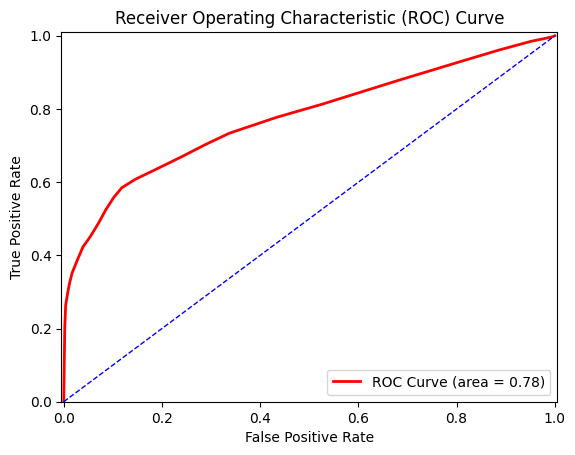

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Initialize the StandardScaler
scaler = StandardScaler()

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=26)

# Create a pipeline with StandardScaler and KNN classifier
pipeline = make_pipeline(scaler, knn_classifier)

# Use cross_val_predict for predictions within each fold of cross-validation
y_predict_prob_knn = cross_val_predict(pipeline, X, y, cv=10, method='predict_proba')[:, 1]

# Creating the FPR AND TPR
fpr, tpr, thresholds = metrics.roc_curve(y, y_predict_prob_knn, pos_label=1)

# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC:", AUC)

# Creating the ROC GRAPH
plt.figure()

# ROC Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()


## KNN classifier with Cross Validaton, Standard Scalar using *Bagging and Voting*



**In this code we add another implementation known as Bagging and Voting that would ensemble of KNN using the loop over for different values of the number which is use for range list of 1 - 31 by 5 for the k values which is use for loop over to give the number of neighbors with the accuracy of the Bagging and Voting.**

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of base classifiers
num_classifiers = 10

# Define a list of n_neighbors values to iterate through
n_neighbors_values = list(range(1, 35, 5))

for n_neighbors in n_neighbors_values:
    print(f"\nNumber of Neighbors: {n_neighbors}")

    # Bagging Classifier
    bagging_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the KNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

        # Create a pipeline with StandardScaler and KNN classifier
        pipeline = make_pipeline(StandardScaler(), knn_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        bagging_predictions += predictions

    # Ensemble predictions by averaging
    bagging_predictions /= num_classifiers

    # Calculate accuracy
    accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

    # Print accuracy for the bagging ensemble
    print(f"Bagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")

    # Voting Classifier
    voting_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the KNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

        # Create a pipeline with StandardScaler and KNN classifier
        pipeline = make_pipeline(StandardScaler(), knn_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        voting_predictions += predictions

    # Ensemble predictions by majority voting
    voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

    # Calculate accuracy
    accuracy_voting = np.mean(voting_predictions == y_train)

    # Print accuracy for the voting ensemble
    print(f"Voting Ensemble Accuracy: {round(accuracy_voting, 2)}")


Number of Neighbors: 1
Bagging Ensemble Accuracy: 0.65
Voting Ensemble Accuracy: 0.65

Number of Neighbors: 6
Bagging Ensemble Accuracy: 0.7
Voting Ensemble Accuracy: 0.7

Number of Neighbors: 11
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Number of Neighbors: 16
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Number of Neighbors: 21
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Number of Neighbors: 26
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Number of Neighbors: 31
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73


### KNN classifier with Cross Validaton and Standard Scalar using Bagging and Voting ROC

**We use this code to implement all of KNN with StandardScaler and Cross validation ROC and KNN classifier with the specified k for the value of 26 with following similar structure with the calculation and visualization of the ROC curve, AUC, Bagging and Voting with the use of cross validation which give us the result of calculation of the result of accuracy**

Bagging Ensemble Accuracy: 0.73
Bagging Ensemble AUC: 0.78


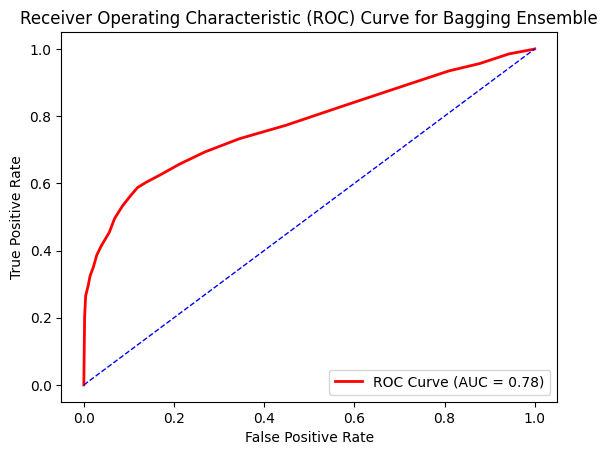

Voting Ensemble Accuracy: 0.73
Voting Ensemble AUC: 0.73


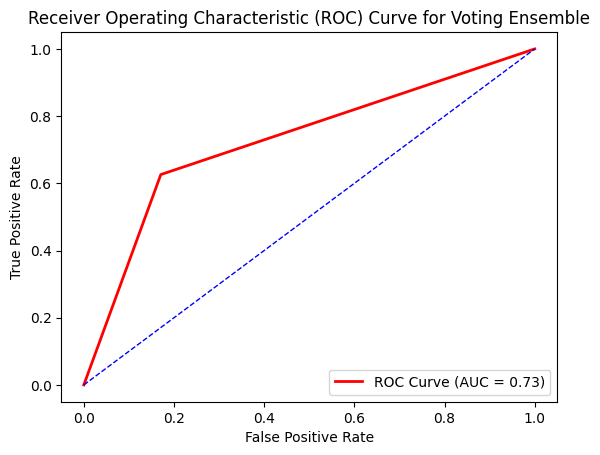

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Set the default k value
default_k = 26

# Define the number of base classifiers
num_classifiers = 10

# Bagging Classifier
bagging_predictions = np.zeros(len(y_train))

# Loop through each base classifier
for _ in range(num_classifiers):
    # Initialize the KNN classifier with the default k value
    knn_classifier = KNeighborsClassifier(n_neighbors=default_k)

    # Create a pipeline with StandardScaler and KNN classifier
    pipeline = make_pipeline(StandardScaler(), knn_classifier)

    # Use cross_val_predict for getting predictions on the training data
    predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]

    # Accumulate predictions
    bagging_predictions += predictions

# Ensemble predictions by averaging
bagging_predictions /= num_classifiers

# Calculate AUC for bagging
bagging_auc = roc_auc_score(y_train, bagging_predictions)

# Print accuracy and AUC for the bagging ensemble
print(f"Bagging Ensemble Accuracy: {round(np.mean(bagging_predictions.round() == y_train), 2)}")
print(f"Bagging Ensemble AUC: {round(bagging_auc, 2)}")

# Plot ROC curve for bagging
fpr, tpr, thresholds = roc_curve(y_train, bagging_predictions)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (AUC = %0.2f)' % bagging_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging Ensemble')
plt.legend(loc="lower right")
plt.show()

# Voting Classifier
voting_predictions = np.zeros(len(y_train))

# Loop through each base classifier
for _ in range(num_classifiers):
    # Initialize the KNN classifier with the default k value
    knn_classifier = KNeighborsClassifier(n_neighbors=default_k)

    # Create a pipeline with StandardScaler and KNN classifier
    pipeline = make_pipeline(StandardScaler(), knn_classifier)

    # Use cross_val_predict for getting predictions on the training data
    predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]

    # Accumulate predictions
    voting_predictions += predictions

# Ensemble predictions by majority voting
voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

# Calculate AUC for voting
voting_auc = roc_auc_score(y_train, voting_predictions)

# Print accuracy and AUC for the voting ensemble
print(f"Voting Ensemble Accuracy: {round(np.mean(voting_predictions == y_train), 2)}")
print(f"Voting Ensemble AUC: {round(voting_auc, 2)}")

# Plot ROC curve for voting
fpr, tpr, thresholds = roc_curve(y_train, voting_predictions)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (AUC = %0.2f)' % voting_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Voting Ensemble')
plt.legend(loc="lower right")
plt.show()

# **Decision Tree Classifier**

****

**Only when splitting the training and testing data is where it dictates the rest of the values's accruacy**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40) # splits

**This code creates the list of 1 - 11 for the r values which will be use for the for loop that will call in the Decision Tree for getting its precision and accuracy. Once the Decision Tree sequence is complete the loop will then printout the vaue combination and print out its accuracy for the random state values. When the loop is finished, the code will finally print out the highest accuracy**

In [ ]:
# List of random state values
random_state_values = list(range(1, 11))

# Assuming you have already defined X_train, X_test, y_train, y_test

highest_accuracy = 0  # Assuming accuracy is between 0 and 1
best_random_state_value = 0

for r in random_state_values:
    # Create Decision Tree classifier with the current random state
    dt_classifier = DecisionTreeClassifier(random_state=r)

    # Train the classifier on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_predict = dt_classifier.predict(X_test)

    # Calculate accuracy on the test data
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current random state value
    print(f"Accuracy on Testing Data of Decision Tree Classifier with random_state={r}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_random_state_value = r

# Print the highest accuracy and corresponding random state value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (random_state={best_random_state_value})")

Accuracy on Testing Data of Decision Tree Classifier with random_state=1: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=2: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=3: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=4: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=5: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=6: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=7: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=8: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=9: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=10: 0.74

Highest Accuracy: 0.74 (random_state=10)


### Decision Tree Classifier ROC

**In this next code it generates a Receiver Operating Characterisitic curve and calculate the Area Under the Curve for vinary classification. In the Decision Tree it specifies the 10 random state and train the data afterwards use the predict the probabilities for the positive class are obtain and its ROC curve calucated using the true labels. Next which is the AUC that would be also be calculated and printed out using the ROC curve and then generates a plot of the ROC curve with the Matplotlib as it displays the visuals from the plot**

AUC: 0.7680420837323025


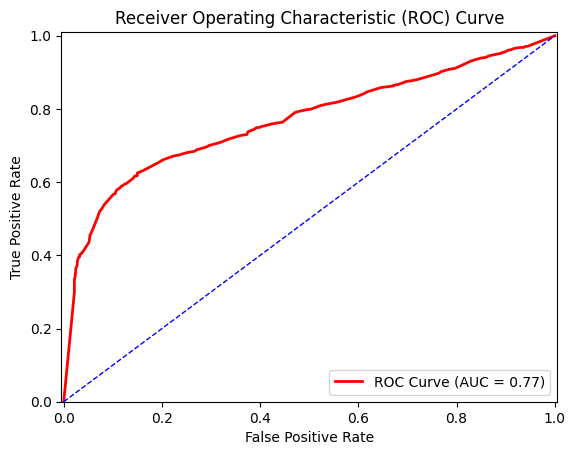

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the Decision Tree classifier with random state 10
dt_classifier = DecisionTreeClassifier(random_state=10)

# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_predict_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob, pos_label=1)

# Calculate AUC
AUC = roc_auc_score(y_test, y_predict_prob)
print("AUC:", AUC)

# Creating the ROC GRAPH
plt.figure()

# ROC Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (AUC = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

## Decision Tree Classifier with **Cross-Validation**


**Here in this code it performs a hyperparameter tuning for Deceision Tree classifier by iterating over different random state values from 1 - 11. For each random state the decision tree classifier would create and k-fold cross validation with the value of 10 and perform to calculate the accuract scores. Thus the mean accuracy across folds is printed for each random state, and the code would identify the random state value that yields the highest mean accuracy which then print the corresponding highest accuracy and random state.**

In [ ]:
from sklearn.model_selection import cross_val_score

# List of random state values
random_state_values = list(range(1, 11))

highest_accuracy = 0
best_random_state_value = 0

for r in random_state_values:
    # Create Decision Tree classifier with the current random state
    dt_classifier = DecisionTreeClassifier(random_state=r)

    # Perform k-fold cross-validation and calculate accuracy scores
    tree_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    tree_mean_accuracy = tree_scores.mean()

    # Print accuracy for the current random state value
    print(f"Mean Accuracy of Decision Tree Classifier with random_state={r}: {round(tree_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if tree_mean_accuracy > highest_accuracy:
        highest_accuracy = tree_mean_accuracy
        best_random_state_value = r

# Print the highest accuracy and corresponding random state value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (random_state={best_random_state_value})")

Mean Accuracy of Decision Tree Classifier with random_state=1: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=2: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=3: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=4: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=5: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=6: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=7: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=8: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=9: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=10: 0.72

Highest Accuracy: 0.72 (random_state=2)


### Decision Tree Classifier with Cross-Validation ROC

**This code is combined with the Decision Tree with the specified random state value 2 to perform the k-fold cross-validation with the ROC. It would calculate the mean accuracy and uses the cross-validationwith value of 10 to obtain the predicted probabilities ofr the positive class, which then used to compute the ROC curve and the AUC. Thus afterward uses the AUC and the ROC curve to print and give a visual perspective of the plot by providing insights into the classifier''s performance between positive and negative.**

Mean Accuracy of Decision Tree Classifier with random_state=2: 0.72
AUC 0.7565394654723104


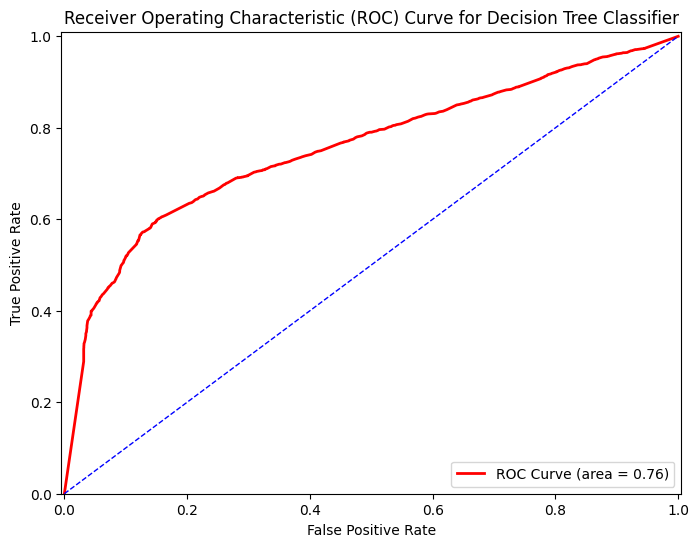

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Set the desired random state
random_state_value = 2

# Create Decision Tree classifier with the specified random state
dt_classifier = DecisionTreeClassifier(random_state=random_state_value)

# Perform k-fold cross-validation and calculate accuracy scores
tree_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')

# Calculate mean accuracy across folds
tree_mean_accuracy = tree_scores.mean()

# Print mean accuracy for the specified random state value
print(f"Mean Accuracy of Decision Tree Classifier with random_state={random_state_value}: {round(tree_mean_accuracy, 2)}")

# Calculate AUC and ROC
y_predict_prob_tree = cross_val_predict(dt_classifier, X, y, cv=10, method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_predict_prob_tree, pos_label=1)
AUC = auc(fpr, tpr)

# Print AUC
print(f"AUC", AUC)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier using **Standard Scalared** and Cross Validation

**This next code performs a hyperparameter tuning for Decision Tree classifier with a random state values from 1 - 11 with the use of cross-validation. It would then initializes StandardScaler to fit and transform the training data which then iterates over the random state values. For each random state, the Decision Tree cassifier is created within the pipeline that includes the feature scaling. The Cross-validation is then use to evaluate the classifier's accuracy and the code would identify the random state value that results in finding the highest mean accuracy and printing both the highest accuract and the corresponding random state value.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# List of random state values
random_state_values = list(range(1, 11))

# Initialize variables to store the highest accuracy and corresponding random state value
highest_accuracy = 0
best_random_state = 0

for random_state_value in random_state_values:
    # Create the Decision Tree classifier with the current random state
    dt_classifier = DecisionTreeClassifier(random_state=random_state_value)

    # Create a pipeline with StandardScaler and DecisionTreeClassifier
    pipeline = make_pipeline(StandardScaler(), dt_classifier)

    # Use cross_val_score for cross-validation
    scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Calculate the mean accuracy across the folds
    mean_accuracy = scores.mean()

    # Print the mean accuracy for the current random state
    print(f"Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state={random_state_value}: {round(mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if mean_accuracy > highest_accuracy:
        highest_accuracy = mean_accuracy
        best_random_state = random_state_value

# Print the highest accuracy and corresponding random state value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (random_state={best_random_state})")

Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=1: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=2: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=3: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=4: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=5: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=6: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=7: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=8: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=9: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with random_state=10: 0.71

Highest Accuracy: 0.71 (random_state=1)


### Decision Tree Classifier with Cross-Validation and Standard Scalar ROC

**This Decision Tree classifier use within a pipeline with StandardScaler and utilizes cross validation to obtain the predicted probabilities for the positive class. The ROC curve and AUC are then calculated and printed which then the plot of the ROC curve display and visual between the true and false positive rate with the indicated legend of the AUC.**

AUC: 0.7575454579347464


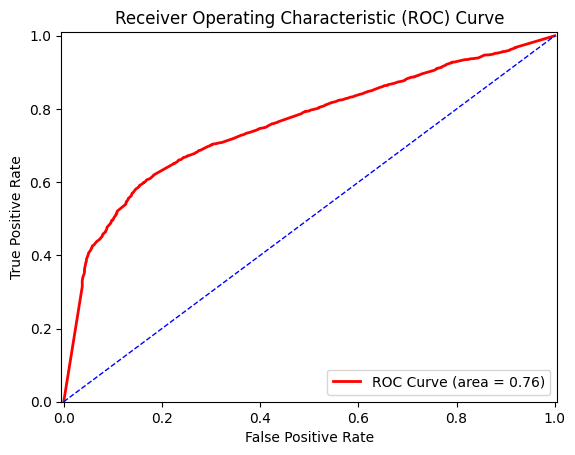

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Initialize the StandardScaler
scaler = StandardScaler()

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=1)

# Create a pipeline with StandardScaler and DecisionTreeClassifier
pipeline = make_pipeline(scaler, dt_classifier)

# Use cross_val_predict for predictions within each fold of cross-validation
y_predict_prob_dt = cross_val_predict(pipeline, X_train, y_train, cv=10, method='predict_proba')

# Creating the FPR AND TPR
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_predict_prob_dt[:, 1], pos_label=1)

# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC:", AUC)

# Creating the ROC GRAPH
plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

## Decision Tree with Cross Validaton and Standard Scalar using **Bagging and Voting**

**In this code we implement the bagging and voting ensemble of the Decision Tree classifier with its random state from 1 - 11. It would then initialize a StandardScaler to fits and transforms the training data, and then iterates over random states. Afterward each of the random state, both bagging and voting are ensembles of Decision Trees are created within pipelines this include feature scaling. The code performs and prints out the bagging and voting accuracy for each ensemble by providing insights into the performance from the group methods under different random state.**

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# List of random state values
random_state_values = list(range(1, 11))

# Define the number of base classifiers
num_classifiers = 10

for random_state_value in random_state_values:
    print(f"\nRandom State: {random_state_value}")

    # Bagging Classifier
    bagging_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Decision Tree classifier without specifying max depth
        dt_classifier = DecisionTreeClassifier(random_state=random_state_value)

        # Create a pipeline with StandardScaler and DecisionTreeClassifier
        pipeline = make_pipeline(StandardScaler(), dt_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        bagging_predictions += predictions

    # Ensemble predictions by averaging
    bagging_predictions /= num_classifiers

    # Calculate accuracy
    accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

    # Print accuracy for the bagging ensemble
    print(f"Bagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")

    # Voting Classifier
    voting_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Decision Tree classifier without specifying max depth and with the random state
        dt_classifier = DecisionTreeClassifier(random_state=random_state_value)

        # Create a pipeline with StandardScaler and DecisionTreeClassifier
        pipeline = make_pipeline(StandardScaler(), dt_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        voting_predictions += predictions

    # Ensemble predictions by majority voting
    voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

    # Calculate accuracy
    accuracy_voting = np.mean(voting_predictions == y_train)

    # Print accuracy for the voting ensemble
    print(f"Voting Ensemble Accuracy: {round(accuracy_voting, 2)}")


Random State: 1
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Random State: 2
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Random State: 3
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Random State: 4
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Random State: 5
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Random State: 6
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Random State: 7
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Random State: 8
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Random State: 9
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Random State: 10
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71


###  Decision Tree Classifier with Cross Validation and Standard Scalar using Bagging and Voting ROC

**On this last code of the Decision Tree classifier it implements and bagging and voting and evaluates their performances with cross-validation predicted probabilities. It would also use StandardScaler to fits and transforms the training data and iterates it over the bagging and voting. The code would then calculate and print out the result of the accuracy and its AUC for both the ensembles and visualize the ROC curve with the corresponding of AUC values. which the AUC gives an insight into the model's ability to differentiate the positive and negative classes.**

Bagging Ensemble Accuracy: 0.71
Bagging Ensemble AUC: 0.75


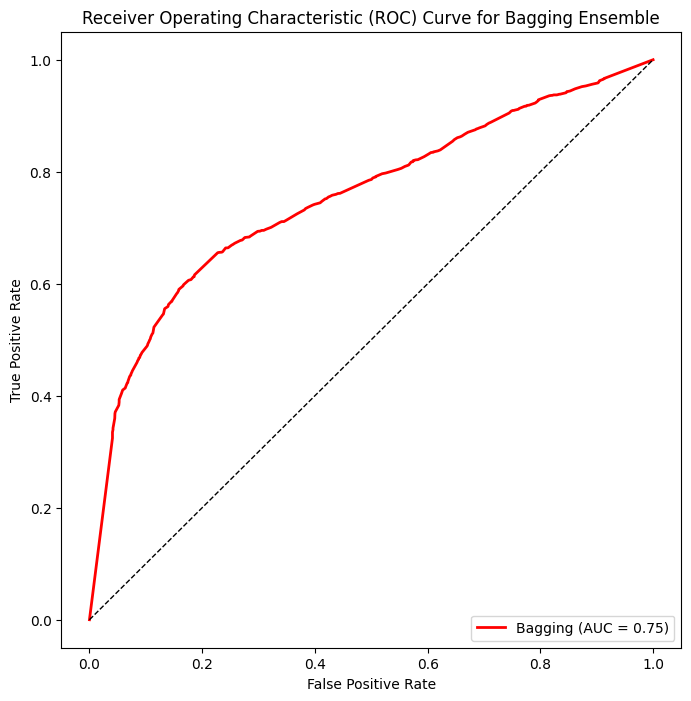

Voting Ensemble Accuracy: 0.71
Voting Ensemble AUC: 0.71


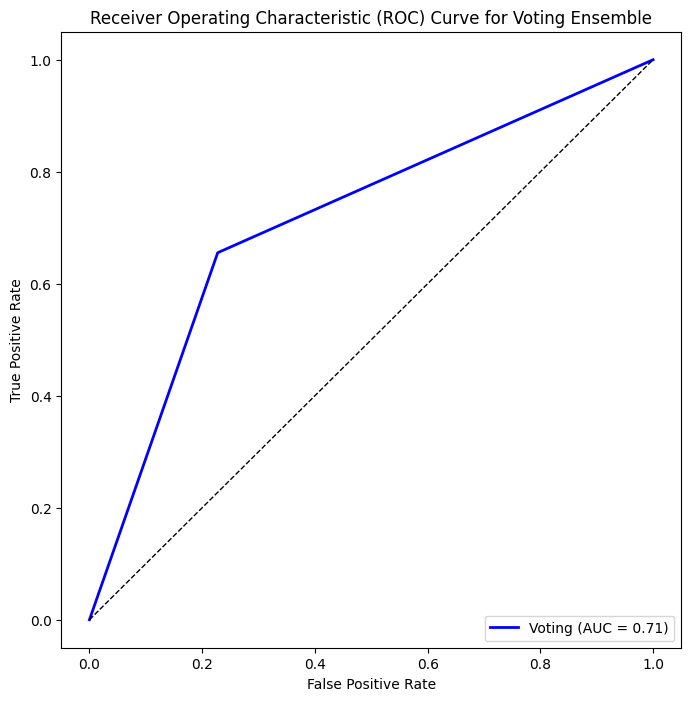

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Set the default random state
random_state_value = 5

# Define the number of base classifiers
num_classifiers = 10

# Bagging Classifier
bagging_predictions = np.zeros(len(y_train))

# Loop through each base classifier
for _ in range(num_classifiers):
    # Initialize the Decision Tree classifier without specifying max depth
    dt_classifier = DecisionTreeClassifier(random_state=random_state_value)

    # Create a pipeline with StandardScaler and DecisionTreeClassifier
    pipeline = make_pipeline(StandardScaler(), dt_classifier)

    # Use cross_val_predict for getting predictions on the training data
    predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]

    # Accumulate predictions
    bagging_predictions += predictions

# Ensemble predictions by averaging
bagging_predictions /= num_classifiers

# Calculate AUC for bagging
bagging_auc = roc_auc_score(y_train, bagging_predictions)

# Print accuracy and AUC for the bagging ensemble
print(f"Bagging Ensemble Accuracy: {round(np.mean(bagging_predictions.round() == y_train), 2)}")
print(f"Bagging Ensemble AUC: {round(bagging_auc, 2)}")

# Plot ROC curve for bagging
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_train, bagging_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr_bagging, tpr_bagging, color='red', lw=2, label=f'Bagging (AUC = {round(bagging_auc, 2)})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging Ensemble')
plt.legend(loc="lower right")
plt.show()

# Voting Classifier
voting_predictions = np.zeros(len(y_train))

# Loop through each base classifier
for _ in range(num_classifiers):
    # Initialize the Decision Tree classifier without specifying max depth and with the random state
    dt_classifier = DecisionTreeClassifier(random_state=random_state_value)

    # Create a pipeline with StandardScaler and DecisionTreeClassifier
    pipeline = make_pipeline(StandardScaler(), dt_classifier)

    # Use cross_val_predict for getting predictions on the training data
    predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]

    # Accumulate predictions
    voting_predictions += predictions

# Ensemble predictions by majority voting
voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

# Calculate AUC for voting
voting_auc = roc_auc_score(y_train, voting_predictions)

# Print accuracy and AUC for the voting ensemble
print(f"Voting Ensemble Accuracy: {round(np.mean(voting_predictions == y_train), 2)}")
print(f"Voting Ensemble AUC: {round(voting_auc, 2)}")

# Plot ROC curve for voting
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_train, voting_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr_voting, tpr_voting, color='blue', lw=2, label=f'Voting (AUC = {round(voting_auc, 2)})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Voting Ensemble')
plt.legend(loc="lower right")
plt.show()


# **Logistic Regression Classifier**


****

**Only when splitting the training and testing data is where it dictates the rest of the values's accuracy**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) # splits

**In this code for Logistic Regression classifier we perform the hyperparameter tuning for the max iteration which it would iterates over a list of value from 100 to 525 by 25 values which then train the model on the training data and evaluates the accuracy on the test data for each of the data. The purpose is to find the max_iter value that would give the highest accuracy on the test set. Thus giving us the final result display with the highest accuracy and its corresponding max_iter value.**

In [ ]:
# Define a list of max_iter values
maxIter_values = list(range(100, 525, 25))

# Assuming you have already defined X_train, X_test, y_train, y_test

# Initialize variables to store the highest accuracy and corresponding max_iter value
highest_accuracy = 0
best_max = 0

for x in maxIter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_classifier = LogisticRegression(max_iter=x)

    # Train the classifier on the training data
    lr_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_predict = lr_classifier.predict(X_test)

    # Calculate accuracy on the test data
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current max_iter value
    print(f"Accuracy on Logistic Regression Classifier with max_iter={x}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_max = x

# Print the highest accuracy and corresponding max_iter value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (max_iter={best_max})")

Accuracy on Logistic Regression Classifier with max_iter=100: 0.7
Accuracy on Logistic Regression Classifier with max_iter=125: 0.7
Accuracy on Logistic Regression Classifier with max_iter=150: 0.7
Accuracy on Logistic Regression Classifier with max_iter=175: 0.7
Accuracy on Logistic Regression Classifier with max_iter=200: 0.7
Accuracy on Logistic Regression Classifier with max_iter=225: 0.7
Accuracy on Logistic Regression Classifier with max_iter=250: 0.7
Accuracy on Logistic Regression Classifier with max_iter=275: 0.7
Accuracy on Logistic Regression Classifier with max_iter=300: 0.7
Accuracy on Logistic Regression Classifier with max_iter=325: 0.7
Accuracy on Logistic Regression Classifier with max_iter=350: 0.7
Accuracy on Logistic Regression Classifier with max_iter=375: 0.7
Accuracy on Logistic Regression Classifier with max_iter=400: 0.7
Accuracy on Logistic Regression Classifier with max_iter=425: 0.7
Accuracy on Logistic Regression Classifier with max_iter=450: 0.7
Accuracy o

### Logistic Regression Classifier ROC

**In this code, Logistice Regression classifier, we set the max_iter with 100 and trains the classifier on the training data and evaluates its performance on the test data. The code is use to calculate and print the accuracy of the classifier on the test data and also computers the AUC for the ROC curve which then shows a display plot of the ROC curve with the calculation of AUC value.**

Accuracy on Logistic Regression Classifier with max_iter=100: 0.7
AUC: 0.7535429671794655


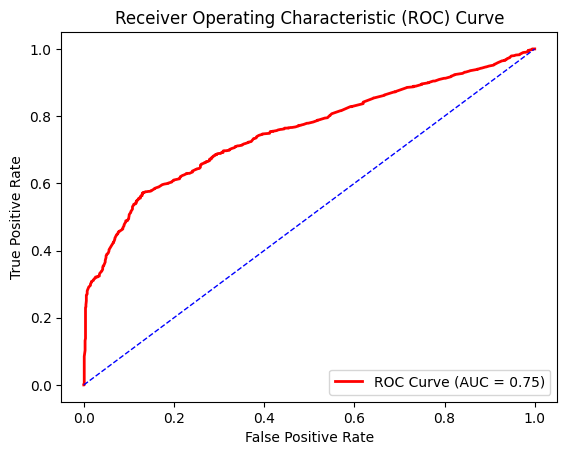

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Set max_iter to 100
max_iter_value = 100

# Create Logistic Regression classifier with max_iter set to 100
lr_classifier = LogisticRegression(max_iter=max_iter_value)

# Train the classifier on the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_predict_prob = lr_classifier.predict_proba(X_test)[:, 1]

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, lr_classifier.predict(X_test))

# Print accuracy for the Logistic Regression classifier with max_iter=100
print(f"Accuracy on Logistic Regression Classifier with max_iter={max_iter_value}: {round(accuracy, 2)}")

# Calculate AUC
auc = roc_auc_score(y_test, y_predict_prob)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## *Logistic Regression with Cross-Validation*

**In this code we perform the k-fold cross-validation for Logistic Regression classifiers with the range of 200 to 525 with the increments of 25. Thus making the mean accuracy scores calculated across the folds for each 'max_iter' value, and the code prints the mean accuracy scores. Finally, it identifies and prints the 'max_iter' value with the highest mean accuracy across the iterations.**

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a list of max_iter values
maxIter_values = list(range(200, 525, 25)) # had to raise since cross validation needed higher max iterations

# Initialize variables to store the highest accuracy and corresponding max_iter value
highest_accuracy = 0
best_max = 0

for x in maxIter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_classifier = LogisticRegression(max_iter=x)

    # Perform k-fold cross-validation and calculate accuracy scores
    logistic_scores = cross_val_score(lr_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    logistic_mean_accuracy = np.mean(logistic_scores)

    # Print mean accuracy for the current max_iter value
    print(f"Logistic Regression with max_iter={x} - Mean Accuracy: {round(logistic_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if logistic_mean_accuracy > highest_accuracy:
        highest_accuracy = logistic_mean_accuracy
        best_max = x

# Print the highest accuracy and corresponding max_iter value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (max_iter={best_max})")

Logistic Regression with max_iter=200 - Mean Accuracy: 0.71
Logistic Regression with max_iter=225 - Mean Accuracy: 0.71
Logistic Regression with max_iter=250 - Mean Accuracy: 0.71
Logistic Regression with max_iter=275 - Mean Accuracy: 0.71
Logistic Regression with max_iter=300 - Mean Accuracy: 0.71
Logistic Regression with max_iter=325 - Mean Accuracy: 0.71
Logistic Regression with max_iter=350 - Mean Accuracy: 0.71
Logistic Regression with max_iter=375 - Mean Accuracy: 0.71
Logistic Regression with max_iter=400 - Mean Accuracy: 0.71
Logistic Regression with max_iter=425 - Mean Accuracy: 0.71
Logistic Regression with max_iter=450 - Mean Accuracy: 0.71
Logistic Regression with max_iter=475 - Mean Accuracy: 0.71
Logistic Regression with max_iter=500 - Mean Accuracy: 0.71

Highest Accuracy: 0.71 (max_iter=200)


### Logistic Regression Classifier with Cros-Validation ROC

**In this code set the 'max_iter' was set to the value of 200 for the Logistic Regression. This uses cross validation to obtain the predicted probabilities for the whole dataset and calculates the AUC. Subsequently, the classifier is trained on the training data and predicts are made on the test data so that it would be calculate the accuracy and AUC. Thus giving the final result print in metrics and generating a ROC curve graph with the Logistic Regression classifier set 200.**


Accuracy on Logistic Regression Classifier with max_iter=200: 0.7
AUC: 0.7535429671794655


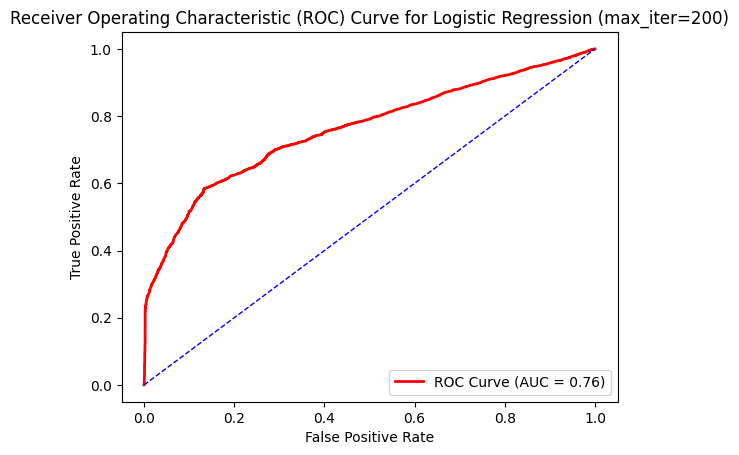

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Set max_iter to 200
max_iter_value = 200

# Create Logistic Regression classifier with max_iter set to 200
lr_classifier = LogisticRegression(max_iter=max_iter_value)

# Use cross_val_predict for getting predicted probabilities on the entire dataset
y_predict_prob = cross_val_predict(lr_classifier, X, y, cv=10, method='predict_proba')[:, 1]

# Calculate AUC
logistic_auc = roc_auc_score(y, y_predict_prob)

# Train the classifier on the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_test_predict_prob = lr_classifier.predict_proba(X_test)[:, 1]

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, lr_classifier.predict(X_test))

# Print accuracy for the Logistic Regression classifier with max_iter=200
print(f"\nAccuracy on Logistic Regression Classifier with max_iter={max_iter_value}: {round(accuracy, 2)}")

# Calculate AUC for the test data
AUC = roc_auc_score(y_test, y_test_predict_prob)
print("AUC:", AUC)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_predict_prob)

# Creating the ROC graph
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {round(logistic_auc, 2)})')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve for Logistic Regression (max_iter={max_iter_value})')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression Classifier using **Standard Scalar** and Cross Validation

**Here in this code it performs the hyperparameter tuning for the max_iter for the logistic regression where it iterates through the list of the values and creates each of the value and builds a pipeline with StandardSCaler and Logistic Regression and afterward it would use the cross validation to calculate the accuracy score and display the mean accuracy of each of the value of 'max_iter'. Then lastly it would print out the highest accuracy of the fold in the 'max_iter'**

In [ ]:
# Define a list of max_iter values
max_iter_values = list(range(200, 525, 25))

# Initialize variables to store the highest accuracy and corresponding max_iter value
highest_accuracy = 0
best_max_iter = 0

for max_iter in max_iter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_classifier = LogisticRegression(max_iter=max_iter)

    # Create a pipeline with StandardScaler and Logistic Regression
    pipeline = make_pipeline(StandardScaler(), lr_classifier)

    # Perform k-fold cross-validation and calculate accuracy scores
    logistic_scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    logistic_mean_accuracy = np.mean(logistic_scores)

    # Print mean accuracy for the current max_iter value
    print(f"Logistic Regression with max_iter={max_iter} - Mean Accuracy: {round(logistic_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if logistic_mean_accuracy > highest_accuracy:
        highest_accuracy = logistic_mean_accuracy
        best_max_iter = max_iter

# Print the highest accuracy and corresponding max_iter value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (max_iter={best_max_iter})")

Logistic Regression with max_iter=200 - Mean Accuracy: 0.71
Logistic Regression with max_iter=225 - Mean Accuracy: 0.71
Logistic Regression with max_iter=250 - Mean Accuracy: 0.71
Logistic Regression with max_iter=275 - Mean Accuracy: 0.71
Logistic Regression with max_iter=300 - Mean Accuracy: 0.71
Logistic Regression with max_iter=325 - Mean Accuracy: 0.71
Logistic Regression with max_iter=350 - Mean Accuracy: 0.71
Logistic Regression with max_iter=375 - Mean Accuracy: 0.71
Logistic Regression with max_iter=400 - Mean Accuracy: 0.71
Logistic Regression with max_iter=425 - Mean Accuracy: 0.71
Logistic Regression with max_iter=450 - Mean Accuracy: 0.71
Logistic Regression with max_iter=475 - Mean Accuracy: 0.71
Logistic Regression with max_iter=500 - Mean Accuracy: 0.71

Highest Accuracy: 0.71 (max_iter=200)


### Logistic Regression Classifier using **Standard Scalar** and Cross Validation ROC

**On this next code we use the Logistic Regression with specific 'max_iter' of 200 and build a pipeline for the StandardScaler and Cross Validation with ROC. We use the cross_val_predict for predictions within each fold of cross-validation, and then calculate the ROC curce and prints the AUC score which lastly it would plot out the ROC curve.**

AUC: 0.7619446648601694


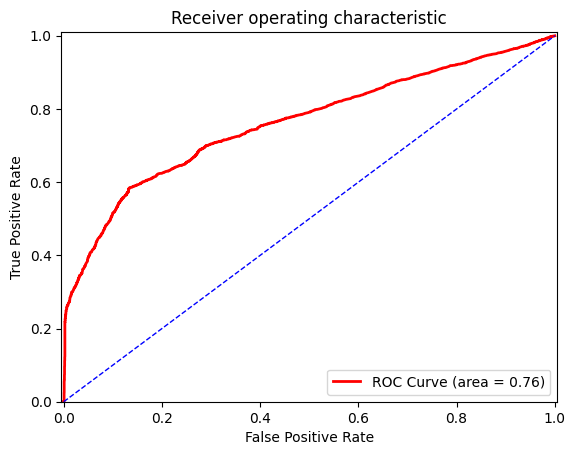

In [ ]:
from sklearn import metrics

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=200)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = make_pipeline(scaler, lr_classifier)

# Use cross_val_predict for predictions within each fold of cross-validation
y_predict_prob_lr = cross_val_predict(pipeline, X, y, cv=10, method='predict_proba')

# Creating the FPR AND TPR
fpr, tpr, thresholds = metrics.roc_curve(y, y_predict_prob_lr[:, 1], pos_label=1)

# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC:", AUC)

# Importing the "pyplot" package of "matplotlib" library of python to generate
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page
# rather than opening a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()

## Logistic Regression with Cross Validaton and Standard Scalar using **Bagging and Voting**


**In this code we have Logistic Regression that initializes StandardSCaler to scale the training data and then performs with the crossvalidation and ensembles both bagging and voting. It will then iterates through the list of 'max_iter' values of 200 to 525 by 25 for each of the value which creates multiple base classifier within the bai=gging and voting thus printing both of them for each of the 'max_iter' value.**

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of base classifiers
num_classifiers = 10

# Define a list of max_iter values to iterate through
max_iter_values = list(range(200, 525, 25))

for max_iter_value in max_iter_values:
    print(f"\nMax Iterations: {max_iter_value}")

    # Bagging Classifier
    bagging_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Logistic Regression classifier
        lr_classifier = LogisticRegression(max_iter=max_iter_value)

        # Create a pipeline with StandardScaler and LogisticRegression
        pipeline = make_pipeline(StandardScaler(), lr_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        bagging_predictions += predictions

    # Ensemble predictions by averaging
    bagging_predictions /= num_classifiers

    # Calculate accuracy
    accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

    # Print accuracy for the bagging ensemble
    print(f"Bagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")

    # Voting Classifier
    voting_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Logistic Regression classifier
        lr_classifier = LogisticRegression(max_iter=max_iter_value, random_state=42)

        # Create a pipeline with StandardScaler and LogisticRegression
        pipeline = make_pipeline(StandardScaler(), lr_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        voting_predictions += predictions

    # Ensemble predictions by majority voting
    voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

    # Calculate accuracy
    accuracy_voting = np.mean(voting_predictions == y_train)

    # Print accuracy for the voting ensemble
    print(f"Voting Ensemble Accuracy: {round(accuracy_voting, 2)}")


Max Iterations: 200
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 225
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 250
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 275
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 300
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 325
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 350
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 375
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 400
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 425
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 450
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 475
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accurac

### Logistic Regression with Cross Validaton and Standard Scalar using **Bagging and Voting** ROC

**Here in the last code of Logistic Regression we combine all the data where we would initialize the StandardScaler to scale the training data and then create bagging and voting to ensembles the use of Logistic Regression with specific value of 200 'max_iter'. Thus will iterate each base classifier to accumulate predictions for both the ensembles where the code calculates the accuracy and AUC for both of the bagging and voting ensembles. and Finally we would also plot the ROCE curve for the visual for both the bagging and voting.**


Bagging Ensemble Accuracy: 0.72
Bagging Ensemble AUC: 0.715804841132685


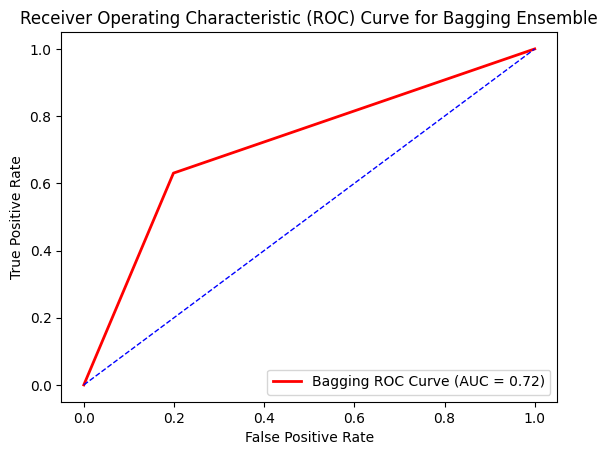


Voting Ensemble Accuracy: 0.72
Voting Ensemble AUC 0.715804841132685


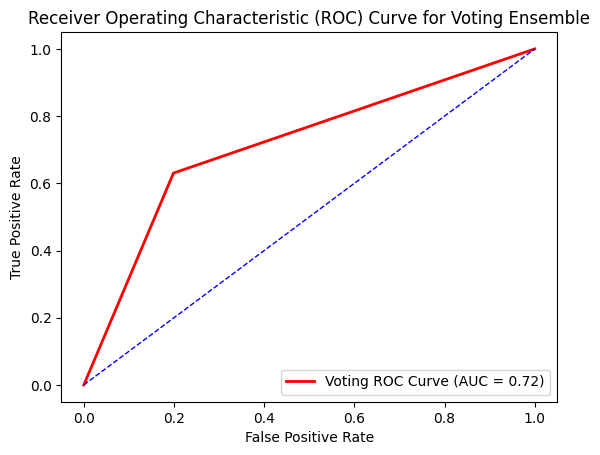

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of base classifiers
num_classifiers = 10

# Set the max_iter value
max_iter_value = 200

# Bagging Classifier
bagging_predictions = np.zeros(len(y_train))

# Loop through each base classifier
for _ in range(num_classifiers):
    # Initialize the Logistic Regression classifier
    lr_classifier = LogisticRegression(max_iter=max_iter_value)

    # Create a pipeline with StandardScaler and LogisticRegression
    pipeline = make_pipeline(StandardScaler(), lr_classifier)

    # Use cross_val_predict for getting predictions on the training data
    predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

    # Accumulate predictions
    bagging_predictions += predictions

# Ensemble predictions by averaging
bagging_predictions /= num_classifiers

# Calculate accuracy for bagging ensemble
accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

# Calculate AUC for bagging
bagging_auc = roc_auc_score(y_train, bagging_predictions)

# Print accuracy and AUC for the bagging ensemble
print(f"\nBagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")
print(f"Bagging Ensemble AUC:" , bagging_auc)

# Plot ROC curve for bagging
fpr_bagging, tpr_bagging, _ = roc_curve(y_train, bagging_predictions)
plt.figure()
plt.plot(fpr_bagging, tpr_bagging, color='red', lw=2, label=f'Bagging ROC Curve (AUC = {round(bagging_auc, 2)})')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging Ensemble')
plt.legend(loc="lower right")
plt.show()

# Voting Classifier
voting_predictions = np.zeros(len(y_train))

# Loop through each base classifier
for _ in range(num_classifiers):
    # Initialize the Logistic Regression classifier
    lr_classifier = LogisticRegression(max_iter=max_iter_value, random_state=42)

    # Create a pipeline with StandardScaler and LogisticRegression
    pipeline = make_pipeline(StandardScaler(), lr_classifier)

    # Use cross_val_predict for getting predictions on the training data
    predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

    # Accumulate predictions
    voting_predictions += predictions

# Ensemble predictions by majority voting
voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

# Calculate accuracy for voting ensemble
accuracy_voting = np.mean(voting_predictions == y_train)

# Calculate AUC for voting
voting_auc = roc_auc_score(y_train, voting_predictions)

# Print accuracy and AUC for the voting ensemble
print(f"\nVoting Ensemble Accuracy: {round(accuracy_voting, 2)}")
print(f"Voting Ensemble AUC", voting_auc)

# Plot ROC curve for voting
fpr_voting, tpr_voting, _ = roc_curve(y_train, voting_predictions)
plt.figure()
plt.plot(fpr_voting, tpr_voting, color='red', lw=2, label=f'Voting ROC Curve (AUC = {round(voting_auc, 2)})')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Voting Ensemble')
plt.legend(loc="lower right")
plt.show()



# Random Forest

**Only when splitting the training and testing data is where it dictates the rest of the values's accruacy**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) # splits

**This code creates the list of 1 - 50 by 10 for the n values which will be with range of random state from 1-6 where it prints and tracks the accuracy for each combination. Then it outputs the best accuracy along the corresponding parameter values as this purpose was to find the best hyperparameters for the Random Forest Classifier on the dataset.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

best_accuracy = 0
best_params = {}

for n_estimators in range(1, 50, 10):  # Adjust the range as needed
    for random_state in range(1, 6):  # Adjust the range as needed
        # Create and fit the RandomForestClassifier
        my_RandomForest = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True, random_state=random_state)
        my_RandomForest.fit(X_train, y_train)

        # Makes predictions
        y_predict = my_RandomForest.predict(X_test)

        # Calculates accuracy
        score = accuracy_score(y_test, y_predict)

        # Prints accuracy for each combination
        print(f'n_estimators={n_estimators}, random_state= {random_state}, Accuracy: {round(score,2)}')

        # Check if current model has better accuracy
        if score > best_accuracy:
            best_accuracy = score
            best_params = {'n_estimators': n_estimators, 'random_state': random_state}

# Print the best accuracy and corresponding parameters
print(f'\nBest Accuracy: {round(best_accuracy,2)} with n_estimators={best_params["n_estimators"]} and random_state={best_params["random_state"]}')

n_estimators=1, random_state= 1, Accuracy: 0.71
n_estimators=1, random_state= 2, Accuracy: 0.7
n_estimators=1, random_state= 3, Accuracy: 0.7
n_estimators=1, random_state= 4, Accuracy: 0.7
n_estimators=1, random_state= 5, Accuracy: 0.7
n_estimators=11, random_state= 1, Accuracy: 0.71
n_estimators=11, random_state= 2, Accuracy: 0.71
n_estimators=11, random_state= 3, Accuracy: 0.71
n_estimators=11, random_state= 4, Accuracy: 0.71
n_estimators=11, random_state= 5, Accuracy: 0.71
n_estimators=21, random_state= 1, Accuracy: 0.71
n_estimators=21, random_state= 2, Accuracy: 0.71
n_estimators=21, random_state= 3, Accuracy: 0.71
n_estimators=21, random_state= 4, Accuracy: 0.71
n_estimators=21, random_state= 5, Accuracy: 0.71
n_estimators=31, random_state= 1, Accuracy: 0.71
n_estimators=31, random_state= 2, Accuracy: 0.71
n_estimators=31, random_state= 3, Accuracy: 0.71
n_estimators=31, random_state= 4, Accuracy: 0.71
n_estimators=31, random_state= 5, Accuracy: 0.71
n_estimators=41, random_state

### Random Forest ROC

**In this next Random ForestClassifier we specify random state value for 5 and n estimator for 21. It fits the model on the training data and predicts on the test data where it would calculate and print the accuracy. In addition, we also calculate the AUC from the ROC curve and plot the ROC curve as it shown in the display to represent the trade-off between the true and false positive rate.**

Accuracy: 0.71
AUC: 0.7619688088537149


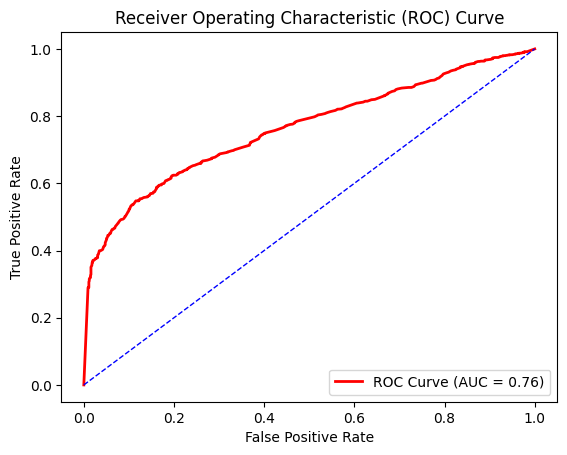

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Set the desired random_state and n_estimators values
random_state_value = 5
n_estimators_value = 21

# Create and fit the RandomForestClassifier
my_RandomForest = RandomForestClassifier(n_estimators=n_estimators_value, bootstrap=True, random_state=random_state_value)
my_RandomForest.fit(X_train, y_train)

# Makes predictions
y_predict = my_RandomForest.predict(X_test)
y_predict_prob = my_RandomForest.predict_proba(X_test)[:, 1]

# Calculates accuracy
accuracy = accuracy_score(y_test, y_predict)

# Prints accuracy for the specified combination
print("Accuracy:", round(accuracy, 2))

# Calculate AUC
auc = roc_auc_score(y_test, y_predict_prob)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## *Random Forest with Cross-Validation*

**In this next code we use Random Forest with the cross validation where we search over the numver of estimator from 1 - 50 by 10 and random state parameter from 1-6. We then use cross-validation to estimate the mean accuracy for each combination where we lastly find the best combination that maximizes the mean accuracy from the cross-validation.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
best_accuracy = 0
best_params = {}

for n_estimators in range(1, 50, 10):
    for random_state in range(1, 6):
        # Create and fit the RandomForestClassifier
        my_RandomForest = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True, random_state=random_state)

        # Use cross-validation to get accuracy scores
        cv_scores = cross_val_score(my_RandomForest, X_train, y_train)

        # Calculate the mean accuracy across folds
        mean_score = cv_scores.mean()

        # Print accuracy for each combination
        print(f'n_estimators={n_estimators}, random_state={random_state}, Mean Accuracy: {round(mean_score, 2)}')

        # Check if current model has better accuracy
        if mean_score > best_accuracy:
            best_accuracy = mean_score
            best_params = {'n_estimators': n_estimators, 'random_state': random_state}

# Print the best accuracy and corresponding parameters
print(f'\nBest Mean Accuracy: {round(best_accuracy, 2)} with n_estimators={best_params["n_estimators"]} and random_state={best_params["random_state"]}')

n_estimators=1, random_state=1, Mean Accuracy: 0.72
n_estimators=1, random_state=2, Mean Accuracy: 0.71
n_estimators=1, random_state=3, Mean Accuracy: 0.71
n_estimators=1, random_state=4, Mean Accuracy: 0.71
n_estimators=1, random_state=5, Mean Accuracy: 0.7
n_estimators=11, random_state=1, Mean Accuracy: 0.72
n_estimators=11, random_state=2, Mean Accuracy: 0.72
n_estimators=11, random_state=3, Mean Accuracy: 0.72
n_estimators=11, random_state=4, Mean Accuracy: 0.72
n_estimators=11, random_state=5, Mean Accuracy: 0.72
n_estimators=21, random_state=1, Mean Accuracy: 0.72
n_estimators=21, random_state=2, Mean Accuracy: 0.72
n_estimators=21, random_state=3, Mean Accuracy: 0.73
n_estimators=21, random_state=4, Mean Accuracy: 0.72
n_estimators=21, random_state=5, Mean Accuracy: 0.72
n_estimators=31, random_state=1, Mean Accuracy: 0.72
n_estimators=31, random_state=2, Mean Accuracy: 0.72
n_estimators=31, random_state=3, Mean Accuracy: 0.72
n_estimators=31, random_state=4, Mean Accuracy: 0.72

### Random Forest with Cross-Validation ROC

**In this upcoming code we combine Cross-validation and ROC from the Random Forest where we specify the n_estimator for value of 41 and random state for 3. It will preform cross-validation and obtain the predicted probabilities and accuracy scores. It will thn calculate and print the mean accuracy and AUC with the specified combination where we finally plot the ROC curve based on its cross-validated predictions.**

Mean Accuracy: 0.73 with n_estimators=41 and random_state=3
AUC: 0.7618733033633409


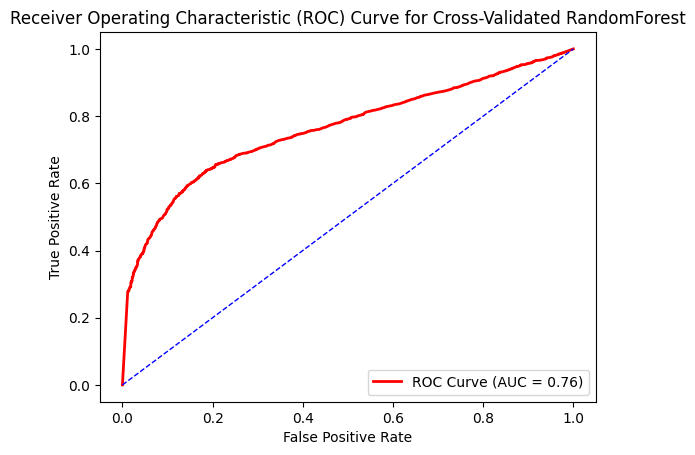

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Set the desired n_estimators and random_state values
n_estimators_value = 41
random_state_value = 3

# Create and fit the RandomForestClassifier
my_RandomForest = RandomForestClassifier(n_estimators=n_estimators_value, bootstrap=True, random_state=random_state_value)

# Use cross-validation to get predicted probabilities and accuracy scores
y_predict_prob_cv = cross_val_predict(my_RandomForest, X_train, y_train, cv=5, method='predict_proba')[:, 1]
cv_scores = cross_val_score(my_RandomForest, X_train, y_train, cv=5)

# Calculate the mean accuracy across folds
mean_score = cv_scores.mean()

# Print mean accuracy for the specified combination
print(f'Mean Accuracy: {round(mean_score, 2)} with n_estimators={n_estimators_value} and random_state={random_state_value}')

# Calculate AUC
auc_cv = roc_auc_score(y_train, y_predict_prob_cv)
print(f'AUC: {(auc_cv)}')

# Plot ROC curve
fpr_cv, tpr_cv, _ = roc_curve(y_train, y_predict_prob_cv)
plt.figure()
plt.plot(fpr_cv, tpr_cv, color='red', lw=2, label=f'ROC Curve (AUC = {round(auc_cv, 2)})')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Cross-Validated RandomForest')
plt.legend(loc="lower right")
plt.show()

## Random Forest using **Standard Scalared** and Cross Validation





**In this code we first use the Standard SCaler where we then create and fit the Random Forest Classifier with values for 'n_estimator' from 1-50 by 10 and 'random_state' from 1-6. We then preform cross-validation and the mean accuracy across folds is calculated for each combination of hyperparameters. Thus printing the mean accuracy values and identigy the combination that results in the highest mean accuracy where it would last print the best mean accuracy from the 'n_estimators' and 'random_state'.**

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

best_accuracy = 0
best_params = {}

for n_estimators in range(1, 50, 10):
    for random_state in range(1, 6):
        # Create and fit the RandomForestClassifier
        my_RandomForest = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True, random_state=random_state)

        # Use cross-validation to get accuracy scores
        cv_scores = cross_val_score(my_RandomForest, X_train_scaled, y_train)

        # Calculate the mean accuracy across folds
        mean_score = cv_scores.mean()

        # Print accuracy for each combination
        print(f'n_estimators={n_estimators}, random_state={random_state}, Mean Accuracy: {round(mean_score, 2)}')

        # Check if the current model has better accuracy
        if mean_score > best_accuracy:
            best_accuracy = mean_score
            best_params = {'n_estimators': n_estimators, 'random_state': random_state}

# Print the best accuracy and corresponding parameters
print(f'\nBest Mean Accuracy: {round(best_accuracy, 2)} with n_estimators={best_params["n_estimators"]} and random_state={best_params["random_state"]}')

n_estimators=1, random_state=1, Mean Accuracy: 0.72
n_estimators=1, random_state=2, Mean Accuracy: 0.71
n_estimators=1, random_state=3, Mean Accuracy: 0.71
n_estimators=1, random_state=4, Mean Accuracy: 0.71
n_estimators=1, random_state=5, Mean Accuracy: 0.7
n_estimators=11, random_state=1, Mean Accuracy: 0.72
n_estimators=11, random_state=2, Mean Accuracy: 0.72
n_estimators=11, random_state=3, Mean Accuracy: 0.72
n_estimators=11, random_state=4, Mean Accuracy: 0.72
n_estimators=11, random_state=5, Mean Accuracy: 0.72
n_estimators=21, random_state=1, Mean Accuracy: 0.72
n_estimators=21, random_state=2, Mean Accuracy: 0.72
n_estimators=21, random_state=3, Mean Accuracy: 0.72
n_estimators=21, random_state=4, Mean Accuracy: 0.72
n_estimators=21, random_state=5, Mean Accuracy: 0.72
n_estimators=31, random_state=1, Mean Accuracy: 0.72
n_estimators=31, random_state=2, Mean Accuracy: 0.72
n_estimators=31, random_state=3, Mean Accuracy: 0.72
n_estimators=31, random_state=4, Mean Accuracy: 0.72

### Random Forest using **Standard Scalared** and Cross Validation ROC

**This code uses Random Forest CLassifier when we specify 'n_estimator_value' by 41 and 'random_state_value' by 3. The features would then be standardized with the Standard Scaler whic then cross-validation  to get the predicted probability and accuracy scores. It would then calculate the mean accuracy across folds and print out the mean accuracy, AUC and the plots of the ROC curve.**

Mean Accuracy: 0.72 with n_estimators=41 and random_state=3
AUC: 0.76


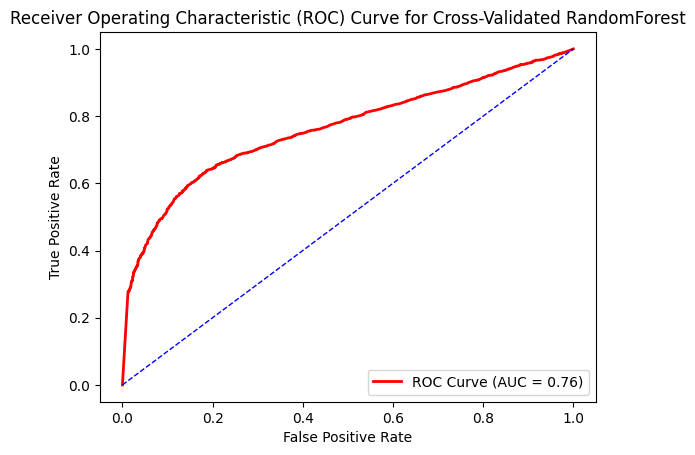

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Set the desired n_estimators and random_state values
n_estimators_value = 41
random_state_value = 3

# Create and fit the RandomForestClassifier
my_RandomForest = RandomForestClassifier(n_estimators=n_estimators_value, bootstrap=True, random_state=random_state_value)

# Use cross-validation to get predicted probabilities and accuracy scores
y_predict_prob_cv = cross_val_predict(my_RandomForest, X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]
cv_scores = cross_val_score(my_RandomForest, X_train_scaled, y_train, cv=5)

# Calculate the mean accuracy across folds
mean_score = cv_scores.mean()

# Print mean accuracy for the specified combination
print(f'Mean Accuracy: {round(mean_score, 2)} with n_estimators={n_estimators_value} and random_state={random_state_value}')

# Calculate AUC
auc_cv = roc_auc_score(y_train, y_predict_prob_cv)
print(f'AUC: {round(auc_cv, 2)}')

# Plot ROC curve
fpr_cv, tpr_cv, _ = roc_curve(y_train, y_predict_prob_cv)
plt.figure()
plt.plot(fpr_cv, tpr_cv, color='red', lw=2, label=f'ROC Curve (AUC = {round(auc_cv, 2)})')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Cross-Validated RandomForest')
plt.legend(loc="lower right")
plt.show()

## Random Forest with Cross Valdiation , Standard Scalared and using **Bagging and Voting**

**Here in the next Random Forest we add the Bagging and Voting with Standard Scaler and Cross-Validation where it evaluates the different 'n_estimators' and 'random_state' values. The accuracy of the Bagging and Voting ensemble is calculated and printed out for each combination where it would iterates throughout the different values of 'n_estimators' and 'random_state' and prints the results.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of base classifiers
num_classifiers = 10

# Define a list of n_estimators values to iterate through
n_estimators_values = list(range(1, 30, 10))

for n_estimators_value in n_estimators_values:
    for random_state_value in range(1, 6):
        print(f"\nn_estimators: {n_estimators_value}, random_state: {random_state_value}")

        # Bagging Classifier
        bagging_predictions = np.zeros(len(y_train))

        # Loop through each base classifier
        for _ in range(num_classifiers):
            # Initialize the Random Forest classifier
            rf_classifier = RandomForestClassifier(n_estimators=n_estimators_value, bootstrap=True, random_state=random_state_value)

            # Use cross_val_predict for getting predictions on the training data
            predictions = cross_val_predict(rf_classifier, X_train_scaled, y_train, cv=5)

            # Accumulate predictions
            bagging_predictions += predictions

        # Ensemble predictions by averaging
        bagging_predictions /= num_classifiers

        # Calculate accuracy
        accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

        # Print accuracy for the bagging ensemble
        print(f"Bagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")

        # Voting Classifier
        voting_predictions = np.zeros(len(y_train))

        # Loop through each base classifier
        for _ in range(num_classifiers):
            # Initialize the Random Forest classifier
            rf_classifier = RandomForestClassifier(n_estimators=n_estimators_value, bootstrap=True, random_state=random_state_value)

            # Use cross_val_predict for getting predictions on the training data
            predictions = cross_val_predict(rf_classifier, X_train_scaled, y_train, cv=5)

            # Accumulate predictions
            voting_predictions += predictions

        # Ensemble predictions by majority voting
        voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

        # Calculate accuracy
       e


n_estimators: 1, random_state: 1
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

n_estimators: 1, random_state: 2
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

n_estimators: 1, random_state: 3
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

n_estimators: 1, random_state: 4
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

n_estimators: 1, random_state: 5
Bagging Ensemble Accuracy: 0.7
Voting Ensemble Accuracy: 0.7

n_estimators: 11, random_state: 1
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

n_estimators: 11, random_state: 2
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

n_estimators: 11, random_state: 3
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

n_estimators: 11, random_state: 4
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

n_estimators: 11, random_state: 5
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

n_estimators: 21, random_s

### Random Forest with Cross Valdiation , Standard Scalared and using **Bagging and Voting** ROC

**This code uses Bagging and Voting Classifier with Random Forest where it would be first initializes the Standard Scaler to fit and transform the training data, and then performs bagging and voting ensembles using the 'cross_val_predict'. The accuracy and AUC for both bagging and voting ensembles are calculated and printed and addionally th ROC curves for both ensembles are plotted and displayed.**

Bagging Ensemble Accuracy: 0.72
Bagging Ensemble AUC: 0.72


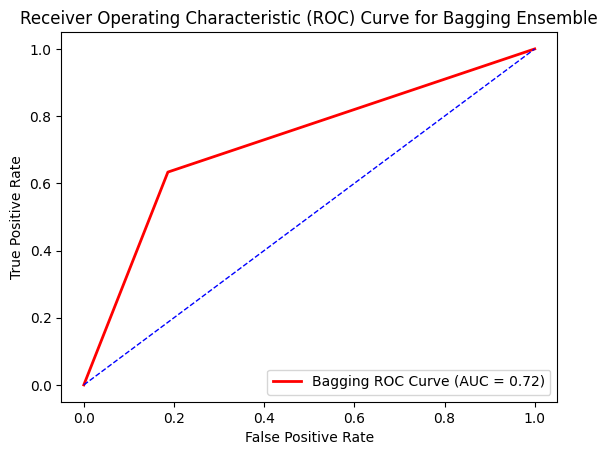

Voting Ensemble Accuracy: 0.72
Voting Ensemble AUC: 0.72


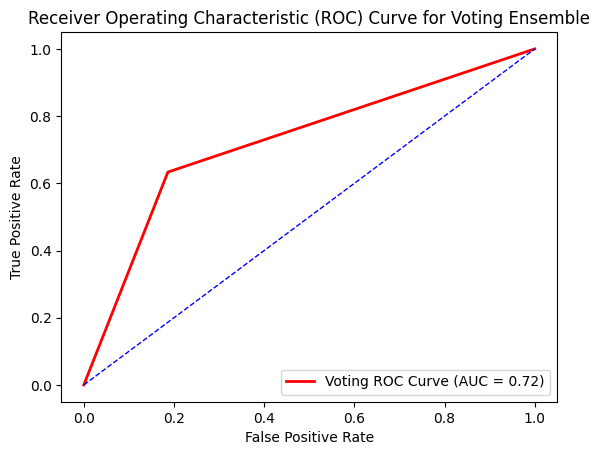

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of base classifiers
num_classifiers = 10

# Set n_estimators and random_state values
n_estimators_value = 11
random_state_value = 2

# Bagging Classifier
bagging_predictions = np.zeros(len(y_train))

# Loop through each base classifier
for _ in range(num_classifiers):
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators_value, bootstrap=True, random_state=random_state_value)

    # Use cross_val_predict for getting predictions on the training data
    predictions = cross_val_predict(rf_classifier, X_train_scaled, y_train, cv=5)

    # Accumulate predictions
    bagging_predictions += predictions

# Ensemble predictions by averaging
bagging_predictions /= num_classifiers

# Calculate accuracy for bagging ensemble
accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

# Print accuracy for the bagging ensemble
print(f"Bagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")

# Calculate AUC for bagging
bagging_auc = roc_auc_score(y_train, bagging_predictions)

# Print AUC for bagging
print(f"Bagging Ensemble AUC: {round(bagging_auc, 2)}")

# Plot ROC curve for bagging
fpr_bagging, tpr_bagging, _ = roc_curve(y_train, bagging_predictions)
plt.figure()
plt.plot(fpr_bagging, tpr_bagging, color='red', lw=2, label=f'Bagging ROC Curve (AUC = {round(bagging_auc, 2)})')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging Ensemble')
plt.legend(loc="lower right")

# Display the bagging graph
plt.show()

# Voting Classifier
voting_predictions = np.zeros(len(y_train))

# Loop through each base classifier
for _ in range(num_classifiers):
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators_value, bootstrap=True, random_state=random_state_value)

    # Use cross_val_predict for getting predictions on the training data
    predictions = cross_val_predict(rf_classifier, X_train_scaled, y_train, cv=5)

    # Accumulate predictions
    voting_predictions += predictions

# Ensemble predictions by majority voting
voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

# Calculate accuracy for voting ensemble
accuracy_voting = np.mean(voting_predictions == y_train)

# Print accuracy for the voting ensemble
print(f"Voting Ensemble Accuracy: {round(accuracy_voting, 2)}")

# Calculate AUC for voting
voting_auc = roc_auc_score(y_train, voting_predictions)

# Print AUC for voting
print(f"Voting Ensemble AUC: {round(voting_auc, 2)}")

# Plot ROC curve for voting
fpr_voting, tpr_voting, _ = roc_curve(y_train, voting_predictions)
plt.figure()
plt.plot(fpr_voting, tpr_voting, color='red', lw=2, label=f'Voting ROC Curve (AUC = {round(voting_auc, 2)})')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Voting Ensemble')
plt.legend(loc="lower right")

# Display the voting graph
plt.show()

# Liner Regression

**We found out that linear regression was The worst algorithem for this specific dataset therefore we will not use ROC nor AUC but use linear regression capable add ons**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) # splits

**Here in our code for Linear Regression we iterate over the range of value from 1 - 11, fits a Linear Regression model for each value, makes predictions on test data and calculates Mean Squared Error and prints out each of its iterations. It tracks the lowest MSE and its corresponding parameter value, and then prints the lowest MSE**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define a list of values to iterate over
lin_reg_values = list(range(1, 11))
lowest_mse = float('inf')
best_max = 0

for j in lin_reg_values:
    # Create a new instance of LinearRegression for each iteration
    my_linreg = LinearRegression()

    # Fit the model on the training data
    my_linreg.fit(X_train, y_train)

    # Make predictions on the test data
    y_prediction = my_linreg.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_prediction)

    # Print MSE for the current iteration
    print(f"MSE on Testing Data of Linear Regression={j}: {round(mse, 2)}")

    # Update the lowest_mse and best_max if the current MSE is lower
    if mse < lowest_mse:
        lowest_mse = mse
        best_max = j

# Print the lowest MSE and the corresponding parameter value
print(f"\nLowest MSE: {round(lowest_mse, 2)} for value={best_max}")

MSE on Testing Data of Linear Regression=1: 0.19
MSE on Testing Data of Linear Regression=2: 0.19
MSE on Testing Data of Linear Regression=3: 0.19
MSE on Testing Data of Linear Regression=4: 0.19
MSE on Testing Data of Linear Regression=5: 0.19
MSE on Testing Data of Linear Regression=6: 0.19
MSE on Testing Data of Linear Regression=7: 0.19
MSE on Testing Data of Linear Regression=8: 0.19
MSE on Testing Data of Linear Regression=9: 0.19
MSE on Testing Data of Linear Regression=10: 0.19

Lowest MSE: 0.19 for value=1


## *Linear Regression with Cross Validation*

**In this code we have the script that employs the k-fold cross-validation with Linear Regression models, where it iteratively varies on 'max_iter' values and calculates and prints the MSE for each iteration and identifying the lowerst MSE and its corresponding value.**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np


maxIter_values = list(range(200, 525, 25))

lowest_error = float('inf')
best_max = 0

for x in maxIter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_model = LinearRegression()

    # Perform k-fold cross-validation and calculate mean squared error
    linreg_errors = -cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_squared_error')

    # Calculate mean squared error across folds
    linreg_mean_error = np.mean(linreg_errors)

    # Print mean squared error for the current max_iter value
    print(f"Linear Regression with max_iter={x} - Mean Squared Error: {round(linreg_mean_error, 2)}")

    # Check if the current mean squared error is lower than the lowest error
    if linreg_mean_error < lowest_error:
        lowest_error = linreg_mean_error
        best_max = x

#Print the Lowest Mean Squared Error and corresponding max_iter value
print(f"\nLowest Mean Squared Error: {round(lowest_error, 2)} (max_iter={best_max})")

Linear Regression with max_iter=200 - Mean Squared Error: 0.19
Linear Regression with max_iter=225 - Mean Squared Error: 0.19
Linear Regression with max_iter=250 - Mean Squared Error: 0.19
Linear Regression with max_iter=275 - Mean Squared Error: 0.19
Linear Regression with max_iter=300 - Mean Squared Error: 0.19
Linear Regression with max_iter=325 - Mean Squared Error: 0.19
Linear Regression with max_iter=350 - Mean Squared Error: 0.19
Linear Regression with max_iter=375 - Mean Squared Error: 0.19
Linear Regression with max_iter=400 - Mean Squared Error: 0.19
Linear Regression with max_iter=425 - Mean Squared Error: 0.19
Linear Regression with max_iter=450 - Mean Squared Error: 0.19
Linear Regression with max_iter=475 - Mean Squared Error: 0.19
Linear Regression with max_iter=500 - Mean Squared Error: 0.19

Lowest Mean Squared Error: 0.19 (max_iter=200)


## Linear Regression with **Standard Scalar** and Cross validation

**This code iterates through different 'lin_red_values' 1 - 11 values in Linear Regression while applying Standard Scaler to the features. For each iteration, it would calculate the mean R2 score through the cross-validation and prints out the results. The last output would then reveal the highest mean R2 score with its corresponding parameter.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a list of values to iterate over
lin_reg_values = list(range(1, 11))
highest_r2_score = 0
best_max = 0

for j in lin_reg_values:
    # Create a new instance of LinearRegression for each iteration
    my_linreg = LinearRegression()

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Calculate cross-validated R2 score using cross_val_score
    r2_scores = cross_val_score(my_linreg, X_scaled, y, cv=5, scoring='r2')

    # Take the mean of cross-validated R2 scores
    mean_r2_score = np.mean(r2_scores)

    # Print R2 score for the current iteration
    print(f"Mean R2 Score on Cross-Validation Data of Linear Regression={j}: {round(mean_r2_score, 2)}")

    # Update the highest_r2_score and best_max if the current R2 score is higher
    if mean_r2_score > highest_r2_score:
        highest_r2_score = mean_r2_score
        best_max = j

# Print the highest R2 score and the corresponding parameter value
print(f"\nHighest Mean R2 Score: {round(highest_r2_score, 2)} for max_iter={best_max}")

Mean R2 Score on Cross-Validation Data of Linear Regression=1: 0.23
Mean R2 Score on Cross-Validation Data of Linear Regression=2: 0.23
Mean R2 Score on Cross-Validation Data of Linear Regression=3: 0.23
Mean R2 Score on Cross-Validation Data of Linear Regression=4: 0.23
Mean R2 Score on Cross-Validation Data of Linear Regression=5: 0.23
Mean R2 Score on Cross-Validation Data of Linear Regression=6: 0.23
Mean R2 Score on Cross-Validation Data of Linear Regression=7: 0.23
Mean R2 Score on Cross-Validation Data of Linear Regression=8: 0.23
Mean R2 Score on Cross-Validation Data of Linear Regression=9: 0.23
Mean R2 Score on Cross-Validation Data of Linear Regression=10: 0.23

Highest Mean R2 Score: 0.23 for max_iter=1


## Linear Regression with Cross Validaton and Standard Scalar using **Bagging and Voting**

**In this code we add bagging and voting where it is applied to a linear regression with different 'lin_reg_values' from 1 - 11 values and Standard Scaler for the fits and transform for the training data. For bagging, predictions are aggregated from multiple linear regression and R2 score would be calculatethe lind. The 'lin_reg_values' result in the highest R2 score for bagging and displays the result. and for the predictions are average across the multiple linear regression models, and the R2 score would be calculated. The T2 score for the voting ensembles and displays the result. Lastly, the 'lin_reg_values' would correspond to the highest R2 score for bagging.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
import numpy as np

# Define a list of values to iterate over
lin_reg_values = list(range(1, 11))
highest_r2_score_bagging = 0
best_max_bagging = 0
highest_r2_score_voting = 0
best_max_voting = 0

# Bagging
num_classifiers = 10  # Number of base classifiers in the ensemble

for j in lin_reg_values:
    # Initialize bagging predictions
    bagging_predictions = np.zeros(len(y))

    for _ in range(num_classifiers):
        # Create a new instance of LinearRegression for each iteration
        my_linreg = LinearRegression()

        # Scale the features using StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Calculate predictions using cross_val_predict
        predictions = cross_val_predict(my_linreg, X_scaled, y, cv=5)

        # Accumulate predictions
        bagging_predictions += predictions

    # Ensemble predictions by averaging
    bagging_predictions /= num_classifiers

    # Calculate R2 score
    r2_score = np.mean((bagging_predictions - y) ** 2)

    # Print R2 score for the current iteration for bagging
    print(f"\nMax Iterations: {j}")
    print(f"Bagging Ensemble Accuracy: {round(r2_score, 2)}")

    # Update the highest_r2_score and best_max if the current R2 score is higher for bagging
    if r2_score > highest_r2_score_bagging:
        highest_r2_score_bagging = r2_score
        best_max_bagging = j

# Voting
voting_predictions = np.zeros(len(y))

for j in lin_reg_values:
    # Create a new instance of LinearRegression for each iteration
    my_linreg = LinearRegression()

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Calculate predictions using cross_val_predict
    predictions = cross_val_predict(my_linreg, X_scaled, y, cv=5)

    # Accumulate predictions
    voting_predictions += predictions

# Ensemble predictions by averaging
voting_predictions /= len(lin_reg_values)

# Calculate R2 score for voting
r2_score_voting = np.mean((voting_predictions - y) ** 2)

# Print the R2 score for voting
print(f"\nMax Iterations: {round(r2_score_voting, 2)}")
print(f"Voting Ensemble Accuracy: {round(r2_score_voting, 2)}")

# Print the highest R2 score and the corresponding parameter value for bagging
print(f"\nHighest Mean R2 Score (Bagging): {round(highest_r2_score_bagging, 2)} for max_iter={best_max_bagging}")


Max Iterations: 1
Bagging Ensemble Accuracy: 0.19

Max Iterations: 2
Bagging Ensemble Accuracy: 0.19

Max Iterations: 3
Bagging Ensemble Accuracy: 0.19

Max Iterations: 4
Bagging Ensemble Accuracy: 0.19

Max Iterations: 5
Bagging Ensemble Accuracy: 0.19

Max Iterations: 6
Bagging Ensemble Accuracy: 0.19

Max Iterations: 7
Bagging Ensemble Accuracy: 0.19

Max Iterations: 8
Bagging Ensemble Accuracy: 0.19

Max Iterations: 9
Bagging Ensemble Accuracy: 0.19

Max Iterations: 10
Bagging Ensemble Accuracy: 0.19

Max Iterations: 0.19
Voting Ensemble Accuracy: 0.19

Highest Mean R2 Score (Bagging): 0.19 for max_iter=1


## Linear Regression with Cross validation , Standard Validation , **AUC, FPR , and TPR into a ROC**

**Lastly in this Linear Regression we specify the 'max_iter' with the value of 200. It utilizes the StandardScaler to scale the features, performs cross-validated predictions, and then binarizes the predictions based on its median. The code would calculate and display the ROC curve and its plot, and the AUC for the Linear Regression with its corresponding 'max_iter' value.**

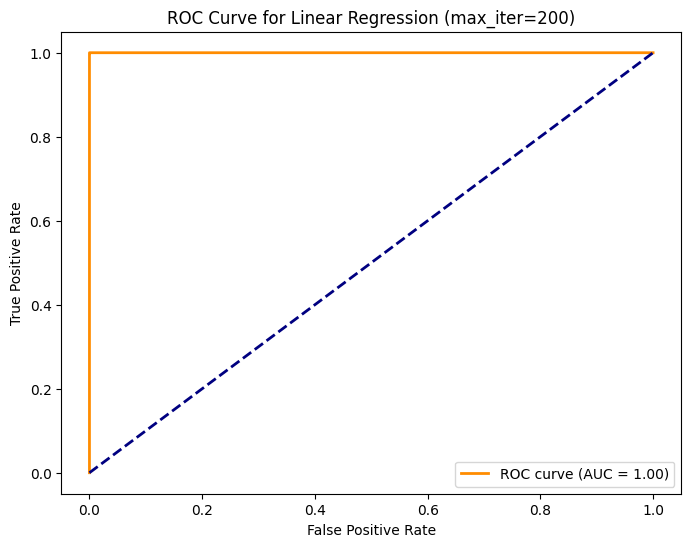

AUC for Linear Regression: 1.00


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, binarize
import matplotlib.pyplot as plt
import numpy as np

# Set max_iter value to 200
max_iter_value = 200

# Create Linear Regression model with the specified max_iter value
lr_model = LinearRegression()

# Initialize the StandardScaler
scaler = StandardScaler()

# Get predictions using cross_val_predict after scaling the features
y_scores = cross_val_predict(lr_model, scaler.fit_transform(X), y, cv=10)

# Binarize predictions based on some threshold (e.g., the median of y)
y_binary = binarize([y_scores], threshold=np.median(y))[0]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_binary, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Linear Regression (max_iter={max_iter_value})')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print(f'AUC for Linear Regression: {roc_auc:.2f}')